**1 Lab tasks**

**1.1 K-means: Clustering some synthetic data**
1. Download from the course site the 2D data stored in data kmeans.txt file.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D

In [786]:
# uploading file in Google Colab
from google.colab import files
uploaded = files.upload()

Saving data_kmeans.txt to data_kmeans (1).txt


In [787]:
# reading file in Google Colab
import io
data = pd.read_csv(io.BytesIO(uploaded['data_kmeans.txt']), delimiter =  " ", header=None)

In [3]:
# reading file in JupyterLab
data = pd.read_csv('data/kmeans/data_kmeans.txt', delimiter =  " ", header=None)

In [4]:
data.head()

,0,1
0,1.8421,4.6076
1,5.6586,4.8000
2,6.3526,3.2909
3,2.9040,4.6122
4,3.2320,4.9399


In [5]:
data.describe()

,0,1
count,300.000000,300.000000
mean,3.684376,2.987101
std,1.925578,1.685079
min,-0.245130,0.205810
25%,2.156175,1.210775
50%,3.231550,2.949750
75%,5.509525,4.807775
max,8.203400,5.784300


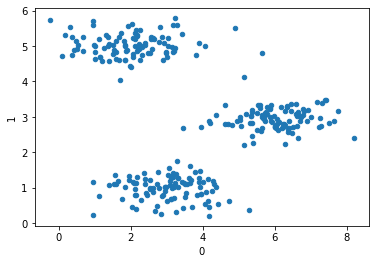

In [790]:
data.plot(x=data.columns[0], y=data.columns[1], kind="scatter")

2. Cluster them using the K-means algorithm using the formulas seen in class.

In [791]:
K = 3
X = np.array(data)

In [792]:
init_centroids = random.sample(range(0, len(data)), K)

In [793]:
centroids = []
for i in init_centroids:
    centroids.append(data.loc[i])
centroids = np.array(centroids)
centroids

array([[2.4558 , 0.78905],
       [5.132  , 2.1981 ],
       [2.0236 , 0.44772]])

In [794]:
def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5

In [795]:
def findClosestCentroids(uk, X):
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in uk:
            distance.append(calc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

In [796]:
def calc_centroids(clusters, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [797]:
get_centroids = findClosestCentroids(centroids, X)

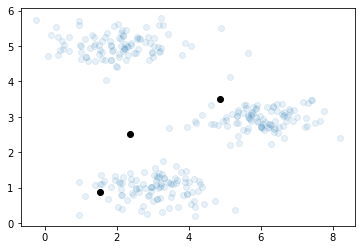

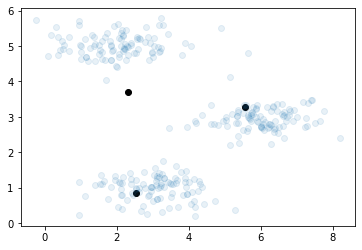

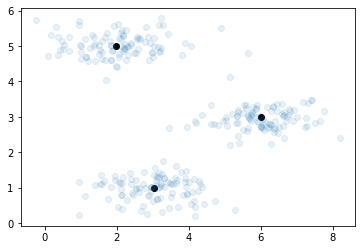

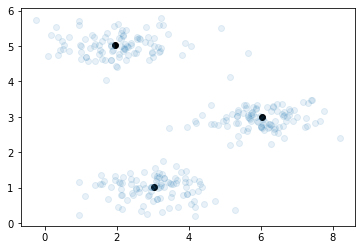

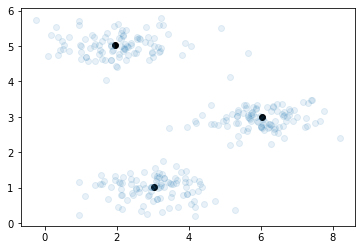

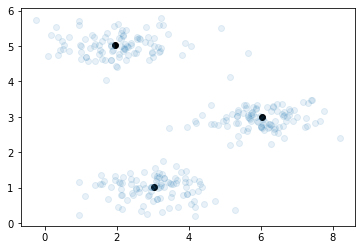

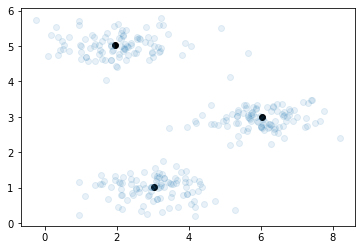

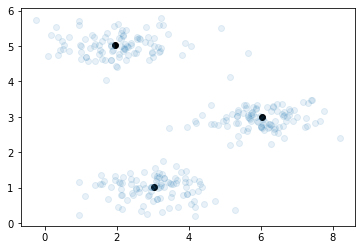

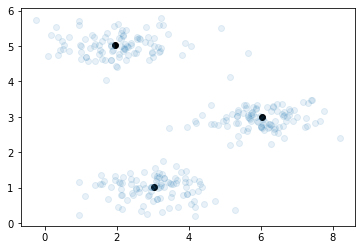

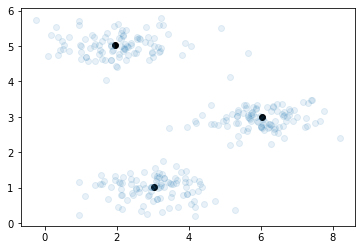

In [798]:
for i in range(10):

    # finding the closest centroid for each data point
    get_centroids = findClosestCentroids(centroids, X)
    # adjusting centroids
    centroids = calc_centroids(get_centroids, X)

    # plotting each iteration
    plt.figure()
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black')
    plt.scatter(X[:, 0], X[:, 1], alpha=0.1)
    plt.show()

3. Test your model with some new data.

In [799]:
x_test = np.random.uniform(low=0.0, high=8.2, size = (1000,2))
get_centroids = findClosestCentroids(centroids, x_test)

4. Plot both training and test results in a 2D graph.

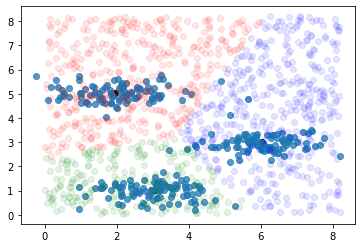

In [800]:
plt.figure()
plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color="black")
plt.scatter(X[:, 0], X[:, 1], alpha=0.75)

for index, x in enumerate(x_test):

    if (get_centroids[index] == 0):
        plt.scatter(x_test[index , 0], x_test[index, 1], alpha=0.1, color="red")
    if (get_centroids[index] == 1):
        plt.scatter(x_test[index, 0], x_test[index, 1], alpha=0.1, color="blue")
    if (get_centroids[index] == 2):
        plt.scatter(x_test[index, 0], x_test[index, 1], alpha=0.1, color="green")

plt.show()

**2 Homework tasks**

**2.1 K-means:Clustering some real data**
1. Using the given dataset, cluster the students in 3 clusters (weak, average and gifted clusters) using the K-means algorithm.

In [801]:
# uploading file in Google Colab
uploaded = files.upload()

Saving grade_students.csv to grade_students (1).csv


In [802]:
# reading file in Google Colab
data_gradeStd = pd.read_csv(io.BytesIO(uploaded['grade_students.csv']))

In [6]:
# reading file in JupyterLab
data_gradeStd = pd.read_csv('data/kmeans/grade_students.csv')

In [7]:
data_gradeStd.head()

,g1freelunch,g1absent,g1readscore,g1mathscore,g1listeningscore,g1wordscore
0,1,9,516,578,601,493
1,0,12,451,507,584,436
2,1,4,483,526,529,486
3,1,15,516,505,556,536
4,1,2,433,463,504,426


In [8]:
data_gradeStd.describe()

,g1freelunch,g1absent,g1readscore,g1mathscore,g1listeningscore,g1wordscore
count,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000
mean,0.500901,7.421261,521.307207,531.456216,567.824324,514.643063
std,0.500044,7.004582,55.278448,43.151113,33.562973,52.858396
min,0.000000,0.000000,404.000000,404.000000,477.000000,317.000000
25%,0.000000,2.000000,478.000000,502.000000,543.000000,475.000000
50%,1.000000,6.000000,516.000000,529.000000,565.000000,514.000000
75%,1.000000,10.000000,558.000000,562.000000,588.000000,551.000000
max,1.000000,84.000000,651.000000,676.000000,708.000000,601.000000


In [822]:
K = 3
X = np.array(data_gradeStd)

init_centroids = random.sample(range(0, len(data_gradeStd)), K)
centroids = []
for i in init_centroids:
    centroids.append(data_gradeStd.loc[i])
centroids = np.array(centroids)
centroids

array([[  1,   6, 492, 520, 541, 499],
       [  0,  28, 516, 520, 571, 506],
       [  1,   5, 651, 584, 577, 601]])

In [823]:
get_centroids = findClosestCentroids(centroids, X)

In [824]:
for i in range(10):

    # finding the closest centroid for each data point
    get_centroids = findClosestCentroids(centroids, X)
    # adjusting centroids
    centroids = calc_centroids(get_centroids, X)

2. Interpret your results. That is, relate the input-feature values to the output values and comment your observations.

In [825]:
res = np.concatenate((X, np.array(get_centroids)[:,None]),axis=1)

In [826]:
y = [res[res[:,6] == k] for k in np.unique(res[:,6])]

In [827]:
means0 = np.zeros(6)
means1 = np.zeros(6)
means2 = np.zeros(6)

for i in range(6):
    means0[i] = np.mean((y[0])[:,i], axis=0)
    means1[i] = np.mean((y[1])[:,i], axis=0)
    means2[i] = np.mean((y[2])[:,i], axis=0)

===freelunch===
cluster 0: 0.7258748674443266
cluster 1: 0.46465968586387435
cluster 2: 0.2521865889212828


===absentism===
cluster 0: 8.635206786850476
cluster 1: 6.93368237347295
cluster 2: 6.567055393586005




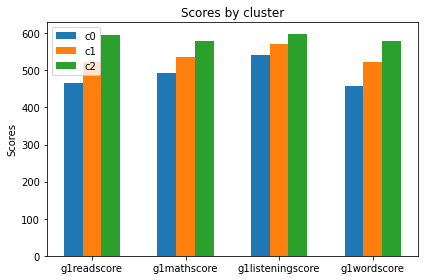

In [828]:
print("===freelunch===")
print("cluster 0:", means0[0])
print("cluster 1:", means1[0])
print("cluster 2:", means2[0])
print('\n')
print("===absentism===")
print("cluster 0:", means0[1])
print("cluster 1:", means1[1])
print("cluster 2:", means2[1])
print('\n')

labels = ['g1readscore', 'g1mathscore', 'g1listeningscore', "g1wordscore"]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, means0[2:6], width, label='c0')
rects2 = ax.bar(x, means1[2:6], width, label='c1')
rects3 = ax.bar(x + width, means2[2:6], width, label='c2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by cluster')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

We identified the cluster 0 as the weak students. They benefit the most from free lunchs, they are the most often absent to class and their results are the lowest.

We identified the cluster 1 as the average students. They benefit of some free lunchs, they are sometimes absent to class and their results are average.

We identified the cluster 2 as the gifted students. They benefit the less from free lunchs, they are the less often absent to class and their results are the best.

**2.2 PCA: Reducing the dimension of some synthetic data**
1. Download from the course site the 2D data stored in data pca.txt file.

In [829]:
# uploading file in Google Colab
uploaded = files.upload()

Saving data_pca.txt to data_pca (1).txt


In [830]:
# reading file in Google Colab
data_pca = pd.read_csv(io.BytesIO(uploaded['data_pca.txt']), delimiter =  " ", header=None)

In [9]:
# reading file in JupyterLab
data_pca = pd.read_csv('data/pca/data_pca.txt', delimiter =  " ", header=None)

In [10]:
data_pca.head()

,0,1
0,3.3816,3.3891
1,4.5279,5.8542
2,2.6557,4.4120
3,2.7652,3.7154
4,2.8466,4.1755


In [11]:
data_pca.describe()

,0,1
count,50.000000,50.000000
mean,3.989264,5.002806
std,1.173058,1.023412
min,1.180200,2.878700
25%,3.051100,4.418225
50%,3.963500,5.012900
75%,4.891300,5.810525
max,5.911300,7.363200


2. Implement the PCA algorithm from the formulas seen in class.

In [835]:
def PCA(X, P = 2):
    # Centering:
    # Step 1 & 2
    X_zero_mean = X - np.mean(X , axis = 0)

    # Step 3: covariance matrix of the mean-centered data.
    cov_mat = np.cov(X_zero_mean , rowvar = False)

    # Step 4: calculating Eigenvalues and Eigenvectors of the covariance matrix
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

    # sort index in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    # sort the eigenvalues
    sorted_eigenvalues = eigen_values[sorted_index]
    # sort the eigenvectors 
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    # selection of the principal component(s)
    eigenvectors_reduced = sorted_eigenvectors[:,0:P]

    # Step 5: Projection of X_zero_mean with eigenvectors 
    X_reduced = np.dot(eigenvectors_reduced.transpose(),X_zero_mean.transpose()).transpose()

    return X_zero_mean, eigenvectors_reduced, X_reduced, sorted_eigenvalues

In [836]:
X = np.array(data_pca)

In [837]:
# Consider the P most significant eigenvectors (dimension of our final reduced data)
P = 1
X_zero_mean, eigenvectors_reduced, _, _ = PCA(X,P)

3. Indicate the principal axes of the data.

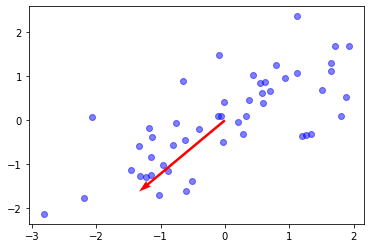

In [838]:
# Principle axes of the data (principal eigenvector represented in red)
plt.figure()
plt.scatter(X_zero_mean[:, 0], X_zero_mean[:, 1], color="blue", alpha=0.5)
plt.quiver(eigenvectors_reduced[0], eigenvectors_reduced[1], color='r', scale=3)
plt.show()

4. Test your model with some new data.

In [839]:
X_test = np.random.normal(loc=[4.0, 5.0], scale=[1.5, 1.0], size = (100,2))

In [840]:
X_test_zero_mean, test_eigenvectors_reduced, _, _ = PCA(X_test, P)

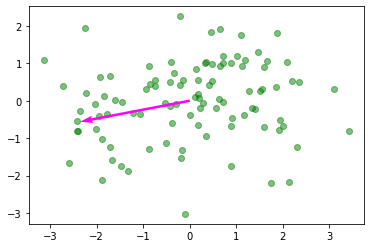

In [841]:
# Principle axes of the data
plt.figure()
plt.scatter(X_test_zero_mean[:, 0], X_test_zero_mean[:, 1], color="green", alpha=0.5)
plt.quiver(test_eigenvectors_reduced[0], test_eigenvectors_reduced[1], color='magenta', scale=3)
plt.show()

5. Plot both training and test results in a 2D graph.

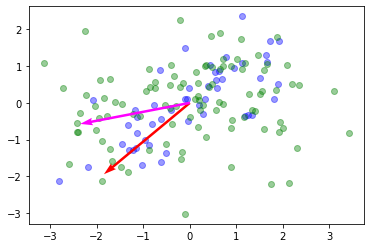

In [842]:
plt.figure()

plt.scatter(X_zero_mean[:, 0], X_zero_mean[:, 1], color="blue", alpha=0.4)
plt.quiver(eigenvectors_reduced[0], eigenvectors_reduced[1], color='r', scale=3)

plt.scatter(X_test_zero_mean[:, 0], X_test_zero_mean[:, 1], color="green", alpha=0.4)
plt.quiver(test_eigenvectors_reduced[0], test_eigenvectors_reduced[1], color='magenta', scale=3)

plt.show()

**2.3 PCA: Reducing the dimension of some real data**
1. Reduce the 8 dimensional data to a meaningful reduced dimensional space for both diabetic and non-diabetic groups separately.

In [843]:
# uploading file in Google Colab
uploaded = files.upload()

Saving diabetes.csv to diabetes (3).csv


In [844]:
# reading file in Google Colab
data_diabete = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

In [12]:
# reading file in JupyterLab
data_diabete = pd.read_csv('data/pca/diabetes.csv')

In [13]:
data_diabete.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
data_diabete.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [854]:
X_diabete = np.array(data_diabete)

In [855]:
# splitting the array in two groups
X_diabete = [X_diabete[X_diabete[:,8] == k] for k in np.unique(X_diabete[:,8])]

In [856]:
print("X_diabete[0]: non-diabetics")
print(X_diabete[0][0:3])
print("X_diabete[1]: diabetics")
print(X_diabete[1][0:3])

X_diabete[0]: non-diabetics
[[  1.     85.     66.     29.      0.     26.6     0.351  31.      0.   ]
 [  1.     89.     66.     23.     94.     28.1     0.167  21.      0.   ]
 [  5.    116.     74.      0.      0.     25.6     0.201  30.      0.   ]]
X_diabete[1]: diabetics
[[  6.    148.     72.     35.      0.     33.6     0.627  50.      1.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.      1.   ]
 [  0.    137.     40.     35.    168.     43.1     2.288  33.      1.   ]]


In [857]:
# removing "Outcome" column as we already have groups
X_diabete[0] = np.delete(X_diabete[0], 8, 1)
X_diabete[1] = np.delete(X_diabete[1], 8, 1)

In [858]:
print("X_diabete[0]: non-diabetics")
print(X_diabete[0][0:3])
print("X_diabete[1]: diabetics")
print(X_diabete[1][0:3])

X_diabete[0]: non-diabetics
[[  1.     85.     66.     29.      0.     26.6     0.351  31.   ]
 [  1.     89.     66.     23.     94.     28.1     0.167  21.   ]
 [  5.    116.     74.      0.      0.     25.6     0.201  30.   ]]
X_diabete[1]: diabetics
[[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.   ]
 [  0.    137.     40.     35.    168.     43.1     2.288  33.   ]]


In [859]:
# Selecting Principal Components

# Group 0 (non-diabetics)
_, _, _, diabete0_sorted_eigenvalues = PCA(X_diabete[0])

# Group 1 (diabetics)
_, _, _, diabete1_sorted_eigenvalues = PCA(X_diabete[1])

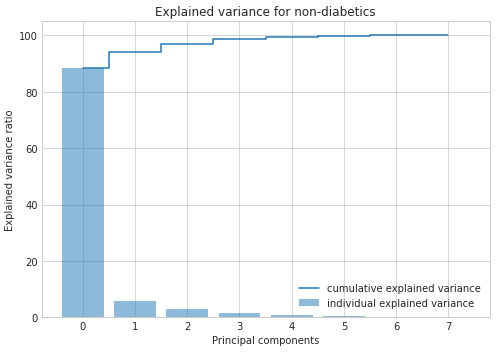

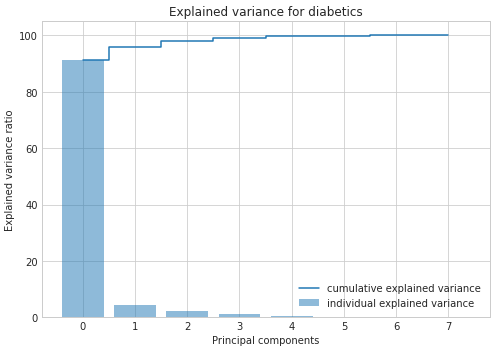

In [860]:
tot = sum(diabete0_sorted_eigenvalues)
var_exp = [(i / tot)*100 for i in diabete0_sorted_eigenvalues]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(7, 5))
    plt.bar(range(8), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(8), cum_var_exp, where='mid', label='cumulative explained variance')
    plt.title('Explained variance for non-diabetics')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

tot = sum(diabete1_sorted_eigenvalues)
var_exp = [(i / tot)*100 for i in diabete1_sorted_eigenvalues]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(7, 5))
    plt.bar(range(8), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(8), cum_var_exp, where='mid', label='cumulative explained variance')
    plt.title('Explained variance for diabetics')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

We can see with those graphs that, in both groups, the overwhelming majority of the variance can be explained by the first principal component alone (roughly 90% in both cases).
We can also see that the second and third principal components still bear some information but the others can be safely dropped without losing to much information.

Based on these observations, we will reduce the datasets in 2D and maybe try in 3D to see what we can interpret from plotting them:

In [861]:
# Reducing to 2D
P = 2;
_, _, X_diabete0_reduced2D, _ = PCA(X_diabete[0], P)
_, _, X_diabete1_reduced2D, _ = PCA(X_diabete[1], P)

In [862]:
# Reducing to 3D
P = 3;
_, _, X_diabete0_reduced3D, _ = PCA(X_diabete[0], P)
_, _, X_diabete1_reduced3D, _ = PCA(X_diabete[1], P)

2. Interpret your results. That is, relate the input-feature values to the output values and comment your observations.

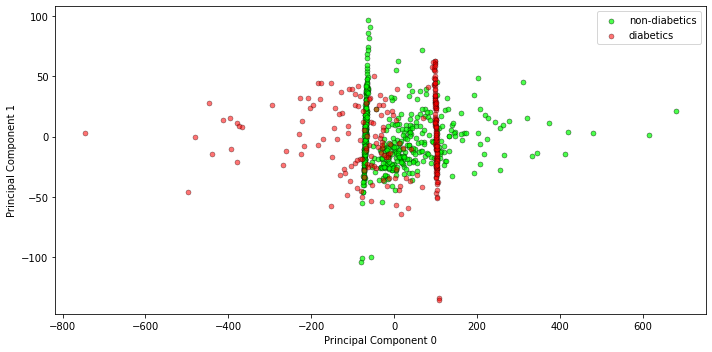

In [863]:
# 2D
plt.figure(figsize=(10, 5))

plt.scatter(X_diabete0_reduced2D[:,0], X_diabete0_reduced2D[:,1], label="non-diabetics", s=25 , c="lime", alpha=0.7, linewidths=0.5, edgecolors="black")
plt.scatter(X_diabete1_reduced2D[:,0], X_diabete1_reduced2D[:,1], label="diabetics", s=25, c="red", alpha=0.55, linewidths=0.5, edgecolors="black")

plt.xlabel('Principal Component 0')
plt.ylabel('Principal Component 1')
plt.legend()
plt.tight_layout()
plt.show()

As we can see in this graph, the two groups are clearly separated by the principal component 0, although there is some overlapping.

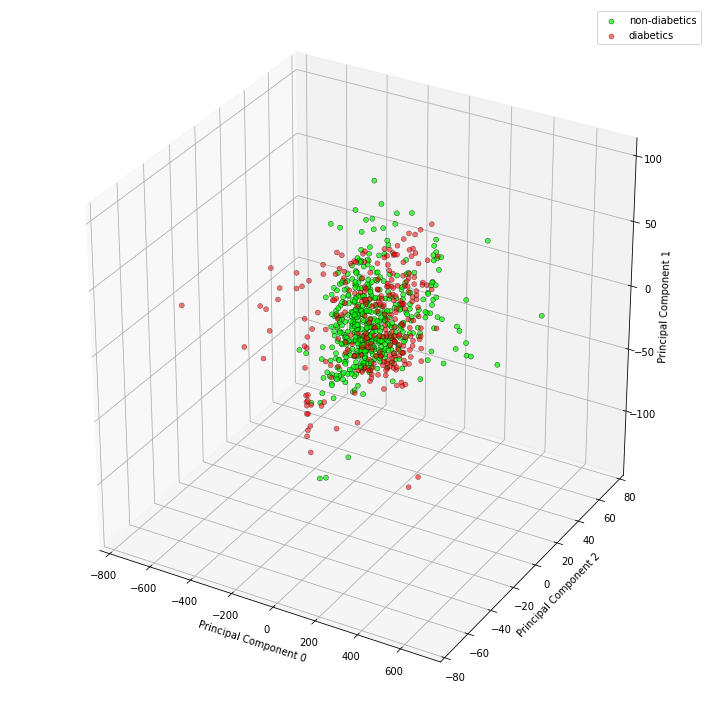

In [864]:
# 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_diabete0_reduced3D[:,0], X_diabete0_reduced3D[:,2], X_diabete0_reduced3D[:,1], label="non-diabetics", zdir='z', s=25, c="lime", alpha=0.7, linewidths=0.5, edgecolors="black", depthshade=True)
ax.scatter(X_diabete1_reduced3D[:,0], X_diabete1_reduced3D[:,2], X_diabete1_reduced3D[:,1], label="diabetics", zdir='z', s=25, c="red", alpha=0.55, linewidths=0.5, edgecolors="black", depthshade=True)

ax.set_xlabel('Principal Component 0')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 1')
plt.legend()
plt.tight_layout()
plt.show()

The 3D graph is not as obvious.